# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
from datetime import datetime
from datetime import date
from datetime import timedelta
# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
import scipy as sp

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


To clean data of any anamolies and possibly outliers which can affect the accuracy of the model. 

It also helps in understanding the  importance level of each features available in the data using visualizations and makes selecting features for the model building easier. 

We can also feature engineer like we did with time_duration in last part of the project.

We can also deal with missing values during EDA but either removing data with missing value, or replacing them with the mean, meidum or mode depeding on which will be most appropriate in the context of the project.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
df = df0.copy() #keeping original dataframe  as backup incase it is needed.

print(df.shape)
print(df.info())



(22699, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  flo

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print("Shape of original dataframe:", df.shape, '\n')
print("Shape of dataframe after dropping duplicates if any:", df.drop_duplicates().shape, '\n')
#checking for missing data in any column row-wise
print('Total data entries with missing values:', df.isna().sum().sum(), '\n')
#output a dataframe with only the missing values:
rows_with_missing_data = df[df.isna().any(axis=1)]
print("rows with missing data entries:", rows_with_missing_data)

Shape of original dataframe: (22699, 18) 

Shape of dataframe after dropping duplicates if any: (22699, 18) 

Total data entries with missing values: 0 

rows with missing data entries: Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount]
Index: []


*We can see that there are no duplicates in the data. Also, there are no missing data entries since the rows returned with missing data entry is empty dataframe.*

Use `.describe()`.

In [5]:
# Use .describe()
#descriptive statistics of th dataset provided
df.describe()


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


We can tell that overall this data looks okay with some small anamolies. The minimum trip distance is not just very small but 0.
Also, maximum total fare is \\$ 1200.29 which is strange for a taxi ride. Furthermore, minimum value of total_amount is - \\$120 which is questionable.
Also, there are quantities like mta_tax and improvement_surcharge with very low standard deviation, which shows that they are not changing much through the rides. 

### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
df.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
# Convert datetime columns to datetime to be able to work with them
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format= '%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format= '%m/%d/%Y %I:%M:%S %p')
print("data type of columns with pickup and drop off timings are: ", df['tpep_pickup_datetime'].dtype, ' and ', df['tpep_dropoff_datetime'].dtype,' respectively')


data type of columns with pickup and drop off timings are:  datetime64[ns]  and  datetime64[ns]  respectively


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [8]:
# Create `duration` column
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

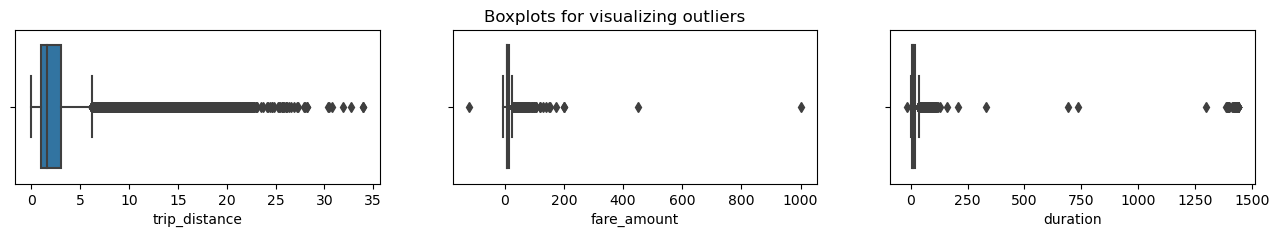

In [10]:
fig,axes =  plt.subplots(1,3,figsize = (16,2))

sns.boxplot(ax = axes[0], x= df['trip_distance'])
sns.boxplot(ax = axes[1], x = df['fare_amount'])
sns.boxplot(ax = axes[2],x = df['duration'])
fig.suptitle('Boxplots for visualizing outliers');


**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**There are some big outliers in the 'fare_amount' and 'duration' columns which may negatively impact model training.**

*We can leave the outliers for trip_distance since they look reasonable. However, we should proabably take care of the extreme outliers in 'fare_amount' and 'duration'.*

Trip distance being 0 could be okay in some cases. Since these could be related to cancelled ride or a ride related to tour of the region. However, these cases should be very small in number. We could contact TLC to verify the reason behind these data entries.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [11]:
# Are trip distances of 0 bad data or very short trips rounded down?
df.sort_values(by='trip_distance').drop_duplicates().head(10)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
22026,63642923,1,2017-07-27 07:44:24,2017-07-27 07:44:24,1,0.0,1,N,41,264,2,10.5,0.0,0.5,0.0,0.0,0.3,11.3,0.000000
795,101135030,1,2017-11-30 07:11:34,2017-11-30 07:11:34,1,0.0,1,N,246,264,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.000000
6908,24162045,2,2017-03-26 02:07:08,2017-03-26 02:07:12,1,0.0,5,N,61,61,1,18.0,0.0,0.0,2.0,0.0,0.3,20.3,0.066667
13561,14504365,1,2017-02-23 16:06:31,2017-02-23 16:06:54,2,0.0,5,N,175,175,3,32.0,0.0,0.0,0.0,0.0,0.3,32.3,0.383333
12238,95544923,1,2017-11-11 09:28:13,2017-11-11 09:28:27,2,0.0,1,N,145,145,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.233333
6878,69466211,2,2017-08-17 04:06:26,2017-08-17 04:06:29,4,0.0,5,N,100,100,1,98.5,0.0,0.5,0.0,0.0,0.3,99.3,0.050000
14372,108639975,1,2017-12-22 13:39:55,2017-12-22 13:44:23,1,0.0,1,N,226,226,2,4.5,0.0,0.5,0.0,0.0,0.3,5.3,4.466667
20638,106367018,1,2017-12-15 16:09:43,2017-12-15 16:09:43,1,0.0,1,N,43,264,2,2.5,1.0,0.5,0.0,0.0,0.3,4.3,0.000000
920,92102517,2,2017-10-31 20:29:53,2017-10-31 20:30:27,1,0.0,1,N,50,50,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.566667
16263,5716905,1,2017-01-27 20:58:29,2017-01-27 20:58:50,1,0.0,1,N,249,249,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.350000


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [12]:
count_of_zeros = df['trip_distance'].value_counts().get(0, default="None")
print("Number of data entries with trip distance 0: ", count_of_zeros)

Number of data entries with trip distance 0:  148


#### `fare_amount` outliers

In [13]:
# checking outliers for fare_amount
df.sort_values(by='fare_amount', ascending= False).drop_duplicates().head(5)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29,0.966667
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30,0.150000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.083333
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.300000


In [14]:
#checking minimum values where we know negative fare_amount data entries are
df.sort_values(by='fare_amount', ascending= True).drop_duplicates().head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,1395.683333
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,2.850000
20698,14668209,2,2017-02-24 00:38:17,2017-02-24 00:42:05,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,3.800000
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3.166667
17602,24690146,2,2017-03-24 19:31:13,2017-03-24 19:34:49,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8,3.600000


**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [15]:
# Impute values less than $0 with 0
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0
df['fare_amount'].sort_values().head()

5448     0.0
14714    0.0
11204    0.0
5758     0.0
12944    0.0
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [16]:
def outlier_adjust(data_frame, column_name, iqr_factor):
    '''
    Impute upper-limit values and negative values to be zero in specified columns based on their interquartile range.

    Arguments:
        data_frame: The DataFrame containing the specified column.
        column_name: The name of the column for which outliers will be adjusted.
        iqr_factor: the factor we want as x in Q3 + (x * IQR) for upper threshold.
    '''
    # Reassign minimum to zero
    data_frame.loc[data_frame[column_name] < 0, column_name] = 0

    # Calculate upper threshold
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + (iqr_factor * IQR)

    # Adjust outliers
    data_frame.loc[data_frame[column_name] > upper_threshold, column_name] = upper_threshold

    return data_frame


In [17]:
#adjust the outlier for 'fare_amount' column
df = outlier_adjust(df,'fare_amount',6)

In [18]:
#let's check the descriptive statistics of fare_amount now
df['fare_amount'].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

The maximum fare cost look reasonable. So, we can proceed ahead.

#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
#fixing the duration outlier using the custom function
df = outlier_adjust(df,'duration',6)

In [21]:
# Call .describe() for duration outliers now
df['duration'].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

The values look more reasonable now.

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so we cannot train a model that uses this feature. However, we can use the statistics of trips we *do* know to generalize about ones we do not know.

In this step, we create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  |    | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
# Create `pickup_dropoff` column
df['pickup_dropoff'] = df['PULocationID'].astype('str')+' '+df['DOLocationID'].astype('str')
df['pickup_dropoff'].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
### YOUR CODE HERE ###
df['mean_distance'] = df.groupby('pickup_dropoff')[['trip_distance']].transform('mean') 
#transform projects the calculated means correctly to match with the index of original


In [24]:
df['mean_distance'].head()

0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64

In [25]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


In [26]:
#testing
df[(df['PULocationID']==186) & (df['DOLocationID']==43)][['mean_distance']]

,mean_distance
1,3.108889
2892,3.108889
4350,3.108889
9818,3.108889
11522,3.108889
12043,3.108889
17262,3.108889
19112,3.108889
20385,3.108889


Let us make similarly make a new column for mean trip duration.

In [27]:
df['mean_duration'] =  df.groupby('pickup_dropoff')[['duration']].transform('mean')

In [28]:
#testing
df[(df['PULocationID']==186) & (df['DOLocationID']==43)][['mean_duration']]

,mean_duration
1,24.47037
2892,24.47037
4350,24.47037
9818,24.47037
11522,24.47037
12043,24.47037
17262,24.47037
19112,24.47037
20385,24.47037


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [29]:
# Create 'day' col
df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()
# Create 'month' col
df['month'] = df['tpep_pickup_datetime'].dt.month_name().str.lower()

In [30]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,march
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,april
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,december
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,april


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [31]:
# Create 'rush_hour' col
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

In [32]:
df['rush_hour'].head()

0     8
1    14
2     7
3    13
4    23
Name: rush_hour, dtype: int32

In [33]:
def rush_hourizer(df, column_name):
    '''
    df is the dataframe we want to use this function on.
    column_name is the column of time/hour in df that we will apply this function on.
    Convert hours betwen 6-10 or 16-20 as 1, and other timing as 0 in the time/hour column.
    '''
    df[column_name] = (((df[column_name]>=6)&(df[column_name]<10))|((df[column_name]>=16)&(df[column_name]<20))).astype('int')
    

In [34]:
# Apply the `rush_hourizer()` function to the new column
rush_hourizer(df,'rush_hour')

In [35]:
# If day is Saturday or Sunday, we also impute 0 in `rush_hour` column regardless of the hour value
df.loc[df.day.isin(['saturday','sunday']), 'rush_hour'] = 0

In [36]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,saturday,march,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,tuesday,april,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,friday,december,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,sunday,may,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,saturday,april,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

(0.0, 80.0)

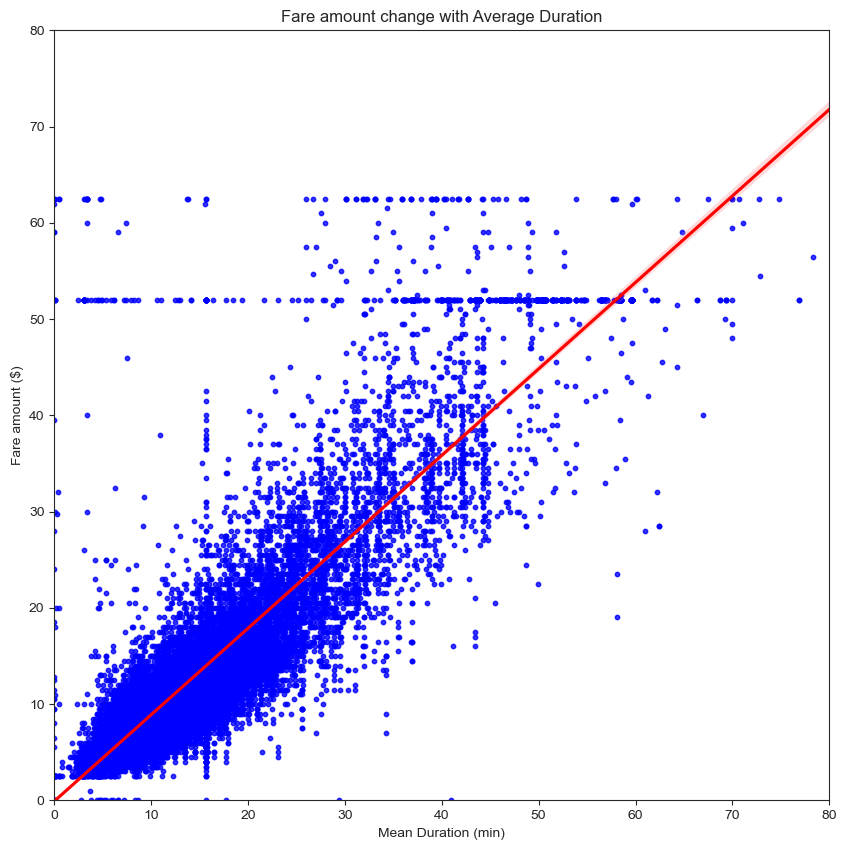

In [37]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.set_style('ticks')
fig,ax = plt.subplots(figsize= (10,10))
ax = sns.regplot(x = df['mean_duration'], y=df['fare_amount'],
                 scatter_kws = {'s':10, 'color':'blue'},
                 line_kws = {'color':'red'})
ax.set_title("Fare amount change with Average Duration")
ax.set_xlabel('Mean Duration (min)')
ax.set_ylabel('Fare amount ($)')
ax.set_xlim(0,80)
ax.set_ylim(0,80)


In [38]:
#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = sp.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

We know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [39]:
### YOUR CODE HERE ###
df[(df['fare_amount'] > 50) & (df['fare_amount'] < 55)]['fare_amount'].value_counts()

fare_amount
52.0    514
50.5      9
51.0      7
51.5      6
53.0      4
52.5      4
54.0      2
54.7      1
54.5      1
Name: count, dtype: int64

Examine the first 30 of these trips.

In [40]:
# display first 20 of these trips with all the columns
pd.set_option('display.max_columns', None)
df[df['fare_amount'] == 52.0].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,sunday,march,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,saturday,june,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,november,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,wednesday,december,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,sunday,september,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,tuesday,february,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,monday,june,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,thursday,august,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,tuesday,september,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,sunday,april,0


**Question:** What do you notice about the first 30 trips?

All these data entries have RateCodeID of 2, which is JFK airport rate code. Also, the other data columns have do not show any similary in these rides. However, we see that there are many tolls of either \$5.76 or \$5.54 which indicate that this could be JFK airport. A quick online search shows this is JFK yellow cab ride which cost $52 in 2017.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [42]:
df1 = df.copy()
df1 = df1.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime','trip_distance', 
                'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID','payment_type', 
                'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int32  
dtypes: float64(3), int32(1), int64(2)
memory usage: 975.5 KB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

We will not plot vendorID since it is a categorical data with two distinct values only.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


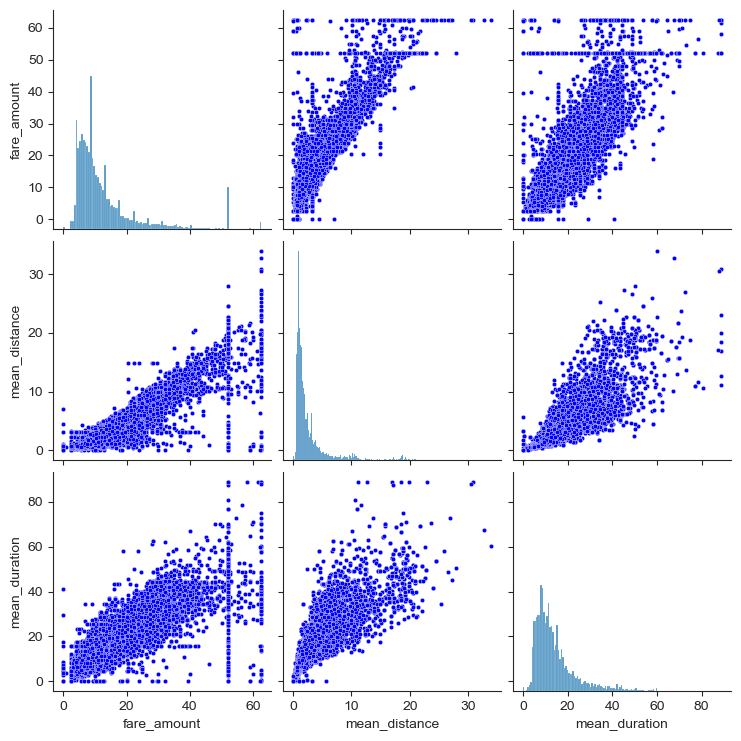

In [43]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df1[['fare_amount','mean_distance','mean_duration']],
            plot_kws={'s':10, 'color':'blue'});

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

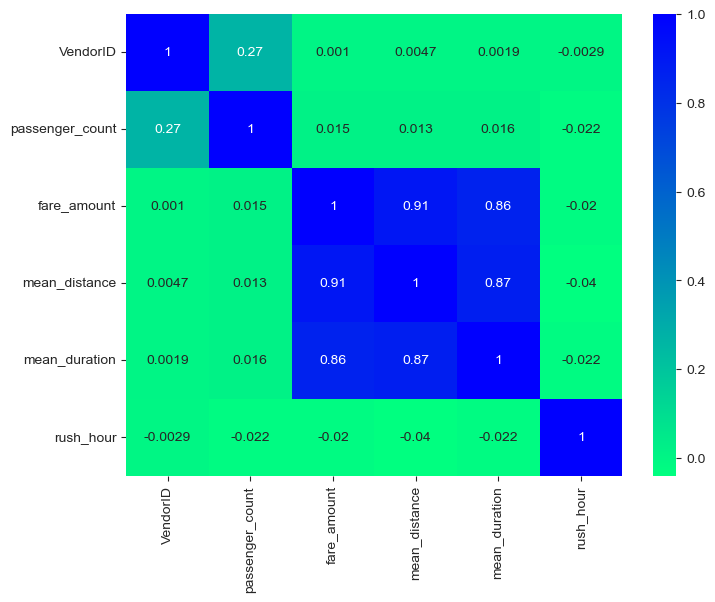

In [44]:
# Correlation matrix to help determine most correlated variables
#let's calculate corrlation matrix and plot it as heatmap
corr_mat = df1.corr(method = 'pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,annot=True, fmt = '.2g', cmap = 'winter_r');

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

We see 'mean_distance' and 'mean_duration' are the ones with highest and significant correlation to 'fare_amount'.
However, these two features are also highly correlated amongst themselves, which one would expect. Dropping one of them should not hurt our model training significantly. However, here we will proceed with both of them.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [45]:
# Remove the target column from the features
X = df1.drop(columns='fare_amount')

# Set y variable
y = df1['fare_amount']
# Display first few rows
X.head()


,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [46]:
# Convert VendorID to string and then to dummy categerical variable
X['VendorID'] = X['VendorID'].astype('str')

# Get dummies

X['VendorID'] = pd.get_dummies(X[['VendorID']], drop_first =True)
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,True,6,3.521667,22.847222,0
1,False,1,3.108889,24.470370,0
2,False,1,0.881429,7.250000,1
3,True,1,3.700000,30.250000,0
4,True,1,4.435000,14.616667,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [47]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [48]:
#making a pipeline to Standarize the data before training with Linear Regression.
pipeline  = Pipeline([('scalar',StandardScaler()),('regressor',LinearRegression()) ])

### Fit the model

Instantiate your model and fit it to the training data.

In [49]:
#fitting data to the model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('regressor', LinearRegression())])

### Task 8c. Evaluate model

In [50]:
#predict on the train set
y_pred1 = pipeline.predict(X_train)

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [61]:
# Evaluate the model performance on the training data

print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred1)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred1)}")
print(f"R^2 Score: {r2_score(y_train, y_pred1)}")
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred1)))

Mean Squared Error: 17.088312217818014
Mean Absolute Error: 2.1819245956286464
R^2 Score: 0.8488017574563115
RMSE: 4.13380118266687


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [52]:
#predict on the test set
y_pred2 = pipeline.predict(X_test)

In [53]:
# Evaluate the model performance on the test data
#testing the model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred2))4rrrr5
print('R^2 Score:', r2_score(y_test, y_pred2))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred2)))

Mean Squared Error: 17.52179121269477
Mean Absolute Error: 2.1247814142132437
R^2 Score: 0.8304785329674023
RMSE: 4.185903870455552


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [54]:
# Create a `results` dataframe
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred2.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()



,actual,predicted,residual
9199,12.5,9.582803,2.917197
4955,6.0,8.608098,-2.608098
16833,12.0,9.179057,2.820943
13244,20.5,20.628286,-0.128286
1063,14.0,15.324450,-1.324450


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

The assumptions for linear regression include the assumption that the residuals:

Have a mean of zero.
Are normally distributed.
Have constant variance (homoscedasticity).
Are independent of each other.

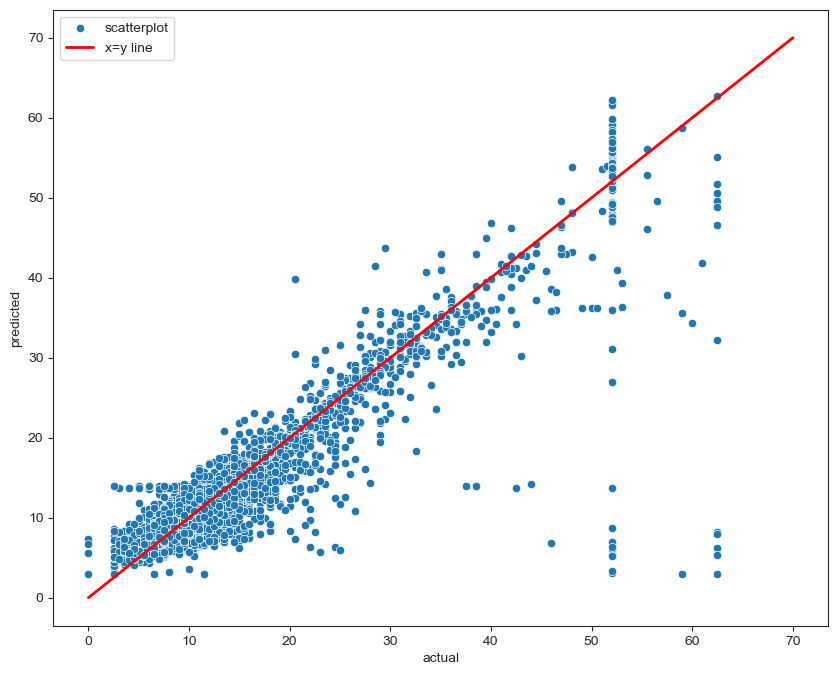

In [55]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(x = results['actual'],
                     y= results['predicted'], 
                     label = 'scatterplot',ax=ax)
#Draw an x=y to show the fit if the model were perfect.
ax.plot([0,70],[0,70], c = 'red',linewidth = 2, label = 'x=y line')
plt.legend();

The assumptions for linear regression fit include the assumption that the residuals:

+ Have a mean of zero.
+ Are normally distributed.
+ Have constant variance (homoscedasticity).
+ Are independent of each other.

Let us check these for our model.

Visualize the distribution of the `residuals` using a histogram.

In [56]:
# Calculate residual mean
results['residual'].mean()

0.05448356587313065

This value is very close to 0 compared to mean of 'fare_amount'.

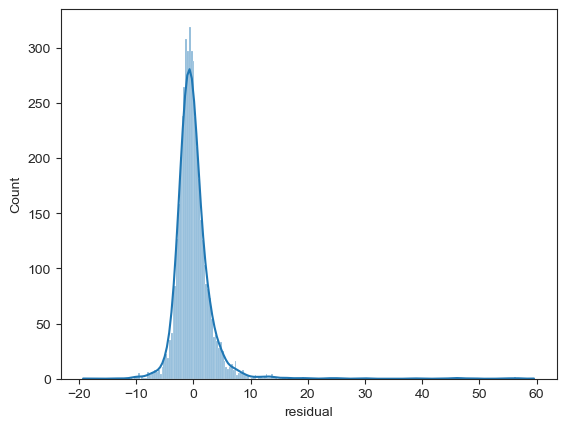

In [57]:
# Visualize the distribution of the `residuals`
sns.histplot(data = results,x = 'residual', kde =True);



This histogram looks very close to a normal distribution.

Create a scatterplot of `residuals` over `predicted`.

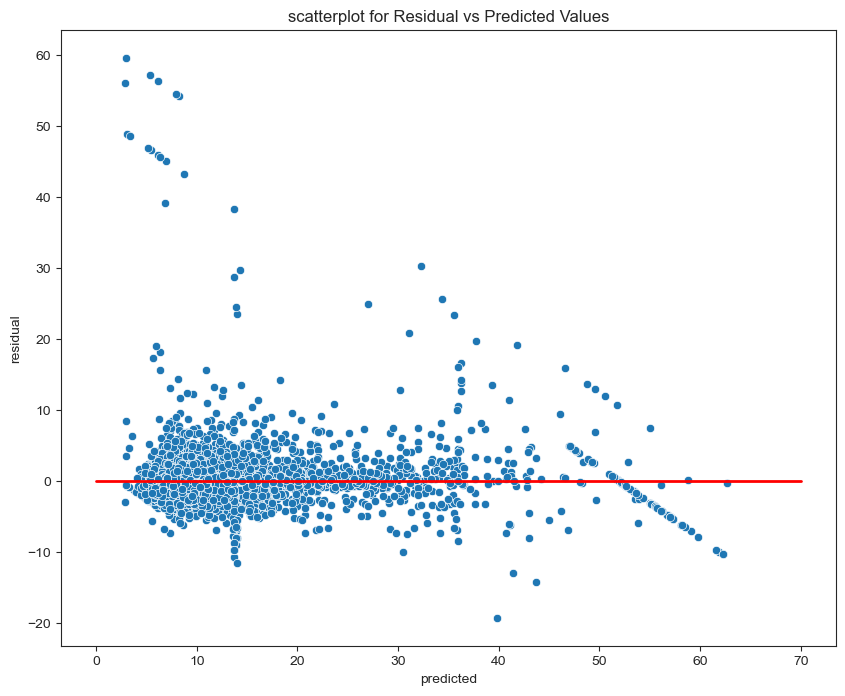

In [58]:
# Create a scatterplot of `residuals` over `predicted`
fig, ax = plt.subplots(figsize = (10,8))
sns.scatterplot(y = results['residual'],
                     x= results['predicted'], 
                      ax = ax)
plt.plot([0,70],[0,0], c = 'red', linewidth  = 2)
plt.title('scatterplot for Residual vs Predicted Values');

Other than the data imputed by adjusting outliers and constant rate for RateCodeID =2 (JFK airport), it looks like the residual distribution is similar below and above y=0 line. This proves homoscedasticity. Also, there is no clear trend in the residuals which tells that they are independent.

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [59]:
coefficients = pipeline.named_steps['regressor'].coef_
column_names = list(X.columns)

print("Coefficients and Corresponding Column Names:")
for col_name, coef in zip(column_names, coefficients):
    print(col_name, ':',coef)

Coefficients and Corresponding Column Names:
VendorID : -0.03149523546518805
passenger_count : 0.014859076081242699
mean_distance : 7.219624843422195
mean_duration : 2.838618355813708
rush_hour : 0.13702772846924224


What do these coefficients mean? How should they be interpreted?

We see that the coefficient corresponding to 'mean_distance' has the highest weigtage. The small magnitude of coefficients associated with 'VendorID' and 'passenger_count' suggest that they do not impact **fare amount** significantly.

We should also note that these coefficients are calculated after standarizing the data so they are not multiplication factors for actual features and output variable. Also, we did not remove some highly correlated features like duration and distance which can lead to some issues like overfitting and reduce misleading importance of features. It might have been a good option to drop, say 'mean_duration' from our model training. The reason for leaving 'duration' in is the fact that even though most ride duration is directly proportional to distance, there are other factors like weather, traffic, road infrastructure, etc which can affect trip duration in some cases.

In [62]:
#let us convert the coefficient for mean_distance and  back to miles to get a better understanding.

std1 = X['mean_distance'].std()
std2 = X['mean_duration'].std()
print("coeffcient for mean distance in miles:",round((coefficients[2]/std1),2))
print("coeffcient for mean duration in miles:",round((coefficients[3]/std2),2))
# MAE for actual data on test data
print("MAE in fare (in dollars):",round(mean_absolute_error(y_test, y_pred2)*std1,2))
# Mean fare amount
print("Mean fare amount (in dollars):", round(np.mean(y),2))

coeffcient for mean distance in miles: 2.03
coeffcient for mean duration in miles: 0.28
MAE in fare (in dollars): 7.56
Mean fare amount (in dollars): 12.9


## Task 9d. Conclusion

1. What are the key takeaways from this notebook?
Exploratory data analysis is a very important step before model training. It not only helps us understand, clean and select the features available in the dataset but engineer new ones if needed.
Fitting a good model can be a back and forth process where we improve our model in each iteration according to our data and our goals.


2. What results can be presented from this notebook?

Our model meets the linear regression assumptions. The performace is decent but not great. Perhaps, we can do better with a more complex machine learning algorithm! 

